In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
### Data Preparation

In [3]:
crypto_df = pd.read_csv('crypto_data.csv')
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
# Discard all cryptocurrencies that are not being traded.
# In other words, filter for currencies that are currently being traded.
filtered_crypto = crypto_df.loc[crypto_df['IsTrading'] == True]
filtered_crypto.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [5]:
# Once you have done this, drop the IsTrading column from the dataframe.
crypto_df2 = filtered_crypto.drop(["IsTrading"], axis='columns')
crypto_df2.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [6]:
# Remove all rows that have at least one null value
crypto_df2.dropna()
crypto_df2.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [7]:
# Filter for cryptocurrencies that have been mined. 
# That is, the total coins mined should be greater than zero.
filtered_crypto2 = crypto_df2.loc[crypto_df2['TotalCoinsMined'] > 0]
filtered_crypto2.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [8]:
# Delete the CoinName from the original dataframe.
crypto_df2 = filtered_crypto2.drop(["CoinName"], axis='columns')
crypto_df2.head()

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0


In [9]:
# Your next step in data preparation is to convert the remaining features with
# text values, Algorithm and ProofType, into numerical data. 
# To accomplish this task, use Pandas to create dummy variables. ???
crypto_df3 = pd.get_dummies(crypto_df2)
crypto_df3.head()

,TotalCoinsMined,Unnamed: 0_1337,Unnamed: 0_1CR,Unnamed: 0_404,Unnamed: 0_42,Unnamed: 0_8BIT,Unnamed: 0_AAC,Unnamed: 0_ABJ,Unnamed: 0_ABS,Unnamed: 0_ABY,...,TotalCoinSupply_91388946,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,4.199995e+01,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.055185e+09,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.927942e+10,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.792718e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
## Examine the number of rows and columns of your dataset now. How did they change?

# Columns increased while rows decreased

In [11]:
# Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.
scaled_crypto_df = StandardScaler().fit_transform(crypto_df3)
print(scaled_crypto_df[0:5])

[[-0.11710817 -0.0433963  -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.09396955 -0.0433963  -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [ 0.52494561 23.04343724 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.11671506 -0.0433963  -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.11474682 -0.0433963  -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]]


In [12]:
### Dimensionality Reduction

In [13]:
# Perform dimensionality reduction with PCA.
# Rather than specify the number of principal components when you instantiate the PCA model,
# it is possible to state the desired explained variance.
# For example, say that a dataset has 100 features.
# Using PCA(n_components=0.99) creates a model that will preserve approximately 99% of the explained variance,
# whether that means reducing the dataset to 80 principal components or 3.
# For this project, preserve 90% of the explained variance in dimensionality reduction.

pca = PCA(n_components=.9)
crypto_pca = pca.fit_transform(scaled_crypto_df)
print(crypto_pca)

[[-3.06477939e-001 -1.34247908e-001 -1.27569126e-015 ...  3.20020441e-280
   3.73722234e-018  3.05890584e-226]
 [-2.86778846e-001 -1.35377776e-001 -2.76558185e-015 ...  4.73438934e-016
  -1.58748949e-014 -2.31993532e-015]
 [ 3.61159332e-001 -3.30370547e-003 -1.83816813e-015 ...  2.51468585e-015
   5.49242787e-015 -2.09645538e-015]
 ...
 [-7.65577452e-002 -3.59257919e-001 -7.45171647e-016 ...  1.88231579e-015
   9.59180068e-015  2.26278388e-015]
 [-3.33346596e-001 -2.83921333e-001  5.33812470e-015 ...  1.68034298e+000
  -3.69647823e-001  8.65078457e-001]
 [-2.28738656e-001 -7.19874552e-002  3.50038705e-015 ...  1.67859846e+000
  -8.31732085e-001 -5.57877856e-001]]


In [14]:
## For this project, preserve 90% of the explained variance in dimensionality reduction. How did the number of the features change?

# Features increased

In [15]:
### Cluster Analysis with k-Means

C:\Users\kblew\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


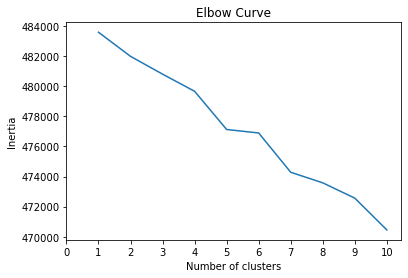

In [16]:
# Create an elbow plot to identify the best number of clusters.
# Use a for-loop to determine the inertia for each k between 1 through 10.
# Determine, if possible, where the elbow of the plot is, and at which value of k it appears.

# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(scaled_crypto_df)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [17]:
### Recommendation

In [18]:
## Can the cryptocurrencies be clustered together? If so, into how many clusters? 

# Due to lack of elbow, the difference wasn't substantial enough to differentiate the groups.